# 1: Data Cleaning & Preprocessing 

 # import the Python libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind

# About Dataset

In [7]:
df_Employee = pd.read_csv("Employee.csv")
df_Employee.head()

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,Divorced,102059,1,No,2012-01-03,No,10,4,9,7
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,CA,White,...,Single,157718,0,Yes,2012-01-04,No,10,6,10,0
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,...,Married,309964,1,No,2012-01-04,No,10,6,10,8
3,47A0-559B,Ermentrude,Berrie,Non-Binary,39,Some Travel,Technology,12,IL,White,...,Married,293132,0,No,2012-01-05,No,10,10,10,0
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,CA,White,...,Single,49606,0,No,2012-01-05,Yes,6,1,1,6


In [8]:
df_Employee.tail()

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,467E-977A,Jud,Melanaphy,Male,20,Some Travel,Technology,28,CA,Black or African American,...,Single,38508,0,No,2022-12-26,No,0,0,0,0
1466,6FB9-A624,Marc,Calver,Non-Binary,27,Some Travel,Technology,8,CA,Black or African American,...,Single,92995,3,No,2022-12-30,No,0,0,0,0
1467,EBF4-5928,Rudolph,MacDearmont,Male,21,Some Travel,Sales,4,CA,Black or African American,...,Single,63375,0,No,2022-12-30,No,0,0,0,0
1468,60E6-B1D9,Merill,Agg,Male,21,Some Travel,Technology,7,CA,Black or African American,...,Married,46521,0,No,2022-12-30,No,0,0,0,0
1469,84D4-D4C3,Naoma,Hebbard,Female,20,No Travel,Technology,28,CA,Black or African American,...,Married,38258,0,No,2022-12-31,No,0,0,0,0


In [9]:
df_Employee.columns

Index(['EmployeeID', 'FirstName', 'LastName', 'Gender', 'Age',
       'BusinessTravel', 'Department', 'DistanceFromHome (KM)', 'State',
       'Ethnicity', 'Education', 'EducationField', 'JobRole', 'MaritalStatus',
       'Salary', 'StockOptionLevel', 'OverTime', 'HireDate', 'Attrition',
       'YearsAtCompany', 'YearsInMostRecentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
df_Employee.shape

(1470, 23)

In [11]:
df_Employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmployeeID               1470 non-null   object
 1   FirstName                1470 non-null   object
 2   LastName                 1470 non-null   object
 3   Gender                   1470 non-null   object
 4   Age                      1470 non-null   int64 
 5   BusinessTravel           1470 non-null   object
 6   Department               1470 non-null   object
 7   DistanceFromHome (KM)    1470 non-null   int64 
 8   State                    1470 non-null   object
 9   Ethnicity                1470 non-null   object
 10  Education                1470 non-null   int64 
 11  EducationField           1470 non-null   object
 12  JobRole                  1470 non-null   object
 13  MaritalStatus            1470 non-null   object
 14  Salary                   1470 non-null  

# Key points

In [13]:
# Data Completeness: All columns have 1,470 non-null entries, indicating no missing data, which simplifies analysis.
# Categorical Variables: Gender, BusinessTravel, Department, State, Ethnicity, EducationField, JobRole, MaritalStatus, OverTime, Attrition.
# Numerical Variables: Age, DistanceFromHome, Education, Salary, StockOptionLevel, YearsAtCompany, YearsInMostRecentRole, YearsSinceLastPromotion, YearsWithCurrManager.
# Date Variable: HireDate.

In [14]:
df_Employee.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,28.989796,7.993055,18.0,23.0,26.0,34.00,51.0
DistanceFromHome (KM),1470.0,22.502721,12.811124,1.0,12.0,22.0,33.00,45.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
Salary,1470.0,112956.497959,103342.889222,20387.0,43580.5,71199.5,142055.75,547204.0
StockOptionLevel,1470.0,0.793878,0.852077,0.0,0.0,1.0,1.00,3.0
YearsAtCompany,1470.0,4.562585,3.288048,0.0,2.0,4.0,7.00,10.0
YearsInMostRecentRole,1470.0,2.293197,2.539093,0.0,0.0,1.0,4.00,10.0
YearsSinceLastPromotion,1470.0,3.440816,2.945194,0.0,1.0,3.0,6.00,10.0
YearsWithCurrManager,1470.0,2.239456,2.505774,0.0,0.0,1.0,4.00,10.0


# Checking null values

In [16]:
df_Employee.isnull().sum()

EmployeeID                 0
FirstName                  0
LastName                   0
Gender                     0
Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome (KM)      0
State                      0
Ethnicity                  0
Education                  0
EducationField             0
JobRole                    0
MaritalStatus              0
Salary                     0
StockOptionLevel           0
OverTime                   0
HireDate                   0
Attrition                  0
YearsAtCompany             0
YearsInMostRecentRole      0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

# Checking duplicates in data

In [18]:
df_Employee.duplicated().sum()

0

In [19]:
df_Employee.dtypes

EmployeeID                 object
FirstName                  object
LastName                   object
Gender                     object
Age                         int64
BusinessTravel             object
Department                 object
DistanceFromHome (KM)       int64
State                      object
Ethnicity                  object
Education                   int64
EducationField             object
JobRole                    object
MaritalStatus              object
Salary                      int64
StockOptionLevel            int64
OverTime                   object
HireDate                   object
Attrition                  object
YearsAtCompany              int64
YearsInMostRecentRole       int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

# Converting datatype

In [21]:
df_Employee['HireDate'] = pd.to_datetime(df_Employee['HireDate'], errors='coerce')

In [22]:
df_Employee.dtypes

EmployeeID                         object
FirstName                          object
LastName                           object
Gender                             object
Age                                 int64
BusinessTravel                     object
Department                         object
DistanceFromHome (KM)               int64
State                              object
Ethnicity                          object
Education                           int64
EducationField                     object
JobRole                            object
MaritalStatus                      object
Salary                              int64
StockOptionLevel                    int64
OverTime                           object
HireDate                   datetime64[ns]
Attrition                          object
YearsAtCompany                      int64
YearsInMostRecentRole               int64
YearsSinceLastPromotion             int64
YearsWithCurrManager                int64
dtype: object

# Identify outliers in Salary

In [24]:
Q1 = df_Employee['Salary'].quantile(0.25)
Q3 = df_Employee['Salary'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

98475.25


In [26]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

-104132.375
289768.625


In [31]:
outliers = df_Employee[(df_Employee['Salary'] < lower_bound) | (df_Employee['Salary'] > upper_bound)]
print(outliers)
print(f"Number of Outliers in Salary: {outliers.shape[0]}")

     EmployeeID   FirstName  LastName      Gender  Age      BusinessTravel  \
2     95D7-1CE9       Ahmed     Sykes        Male   43         Some Travel   
3     47A0-559B  Ermentrude    Berrie  Non-Binary   39         Some Travel   
12    8BAB-B4A6       Torey     Abram        Male   38         Some Travel   
15    5C03-1009    Willetta  Lurriman      Female   42         Some Travel   
24    469A-8121       Baxie    Rising        Male   30         Some Travel   
...         ...         ...       ...         ...  ...                 ...   
1422  5E73-CE19         Gus      Dyos      Female   29         Some Travel   
1425  372C-E204     Doralia    Vassie      Female   35         Some Travel   
1426  A4FE-424E     Domenic    Lorenc        Male   34  Frequent Traveller   
1447  F062-0B8F        Caty    Avarne      Female   29         Some Travel   
1463  8B55-CBEC       Symon   Raisher        Male   40         Some Travel   

           Department  DistanceFromHome (KM) State  \
2     Hum

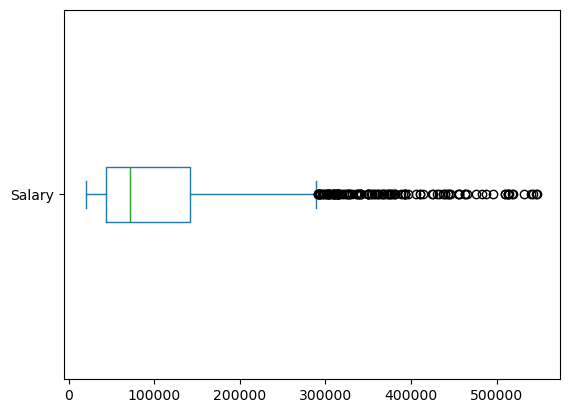

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
df_Employee['Salary'].plot(kind='box', vert=False)
plt.show()

# Identify outliers in Age

In [44]:
Quartile1 = df_Employee['Age'].quantile(0.25)
Quartile3 = df_Employee['Age'].quantile(0.75)
IQR1 = Quartile3 - Quartile1
print(IQR1)

11.0


In [46]:
lower_bound1 = Quartile1 - 1.5 * IQR1
upper_bound1 = Quartile3 + 1.5 * IQR1
print(lower_bound1)
print(upper_bound1)

6.5
50.5


In [47]:
outliers1 = df_Employee[(df_Employee['Age'] < lower_bound1) | (df_Employee['Age'] > upper_bound1)]
print(outliers1)
print(f"Number of Outliers in Age: {outliers1.shape[0]}")

     EmployeeID FirstName   LastName Gender  Age BusinessTravel  Department  \
1185  08AC-30AB      Wolf  Sainsbury   Male   51    Some Travel  Technology   

      DistanceFromHome (KM) State Ethnicity  ...  MaritalStatus  Salary  \
1185                     30    NY     White  ...       Divorced  232658   

     StockOptionLevel OverTime   HireDate  Attrition YearsAtCompany  \
1185                1       No 2021-01-17         No              1   

     YearsInMostRecentRole YearsSinceLastPromotion  YearsWithCurrManager  
1185                     1                       1                     1  

[1 rows x 23 columns]
Number of Outliers in Age: 1


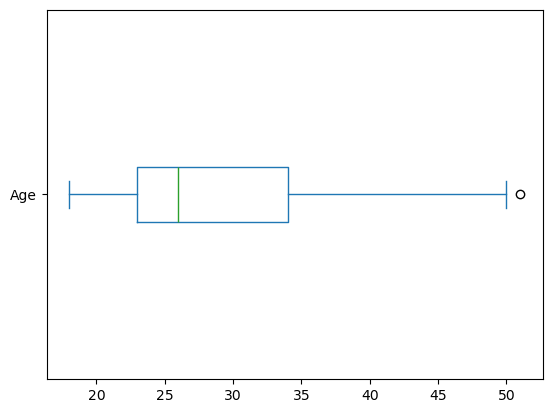

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
df_Employee['Age'].plot(kind='box', vert=False)
plt.show()

In [49]:
df_PerformanceRating = pd.read_csv("PerformanceRating.csv")
df_PerformanceRating.head()

,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
0,PR01,79F7-78EC,1/2/2013,5,4,5,1,0,4,4,4
1,PR02,B61E-0F26,1/3/2013,5,4,4,1,3,4,4,3
2,PR03,F5E3-48BB,1/3/2013,3,4,5,3,2,3,5,4
3,PR04,0678-748A,1/4/2013,5,3,2,2,0,2,3,2
4,PR05,541F-3E19,1/4/2013,5,2,3,1,0,4,4,3


In [51]:
df_PerformanceRating.tail()

,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
6704,PR995,4F28-CFAF,3/14/2016,5,3,3,3,1,5,5,4
6705,PR996,7C80-94E0,3/14/2016,3,5,4,2,1,3,4,4
6706,PR997,8233-2483,3/14/2016,3,4,2,3,1,2,3,2
6707,PR998,8A5B-3D6E,3/15/2016,5,2,5,2,2,4,3,3
6708,PR999,4500-37EB,3/16/2016,4,5,5,3,1,2,3,3


In [52]:
df_PerformanceRating.shape

(6709, 11)

In [56]:
df_PerformanceRating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6709 entries, 0 to 6708
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   PerformanceID                    6709 non-null   object
 1   EmployeeID                       6709 non-null   object
 2   ReviewDate                       6709 non-null   object
 3   EnvironmentSatisfaction          6709 non-null   int64 
 4   JobSatisfaction                  6709 non-null   int64 
 5   RelationshipSatisfaction         6709 non-null   int64 
 6   TrainingOpportunitiesWithinYear  6709 non-null   int64 
 7   TrainingOpportunitiesTaken       6709 non-null   int64 
 8   WorkLifeBalance                  6709 non-null   int64 
 9   SelfRating                       6709 non-null   int64 
 10  ManagerRating                    6709 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 576.7+ KB


In [62]:
df_PerformanceRating.describe().T

,count,mean,std,min,25%,50%,75%,max
EnvironmentSatisfaction,6709.0,3.872559,0.940701,1.0,3.0,4.0,5.0,5.0
JobSatisfaction,6709.0,3.430616,1.152565,1.0,2.0,3.0,4.0,5.0
RelationshipSatisfaction,6709.0,3.427336,1.156753,1.0,2.0,3.0,4.0,5.0
TrainingOpportunitiesWithinYear,6709.0,2.012968,0.820310,1.0,1.0,2.0,3.0,3.0
TrainingOpportunitiesTaken,6709.0,1.017290,0.950316,0.0,0.0,1.0,2.0,3.0
WorkLifeBalance,6709.0,3.414667,1.143961,1.0,2.0,3.0,4.0,5.0
SelfRating,6709.0,3.984051,0.816432,3.0,3.0,4.0,5.0,5.0
ManagerRating,6709.0,3.473394,0.961738,2.0,3.0,3.0,4.0,5.0


# Checking null values

In [65]:
df_PerformanceRating.isnull().sum()

PerformanceID                      0
EmployeeID                         0
ReviewDate                         0
EnvironmentSatisfaction            0
JobSatisfaction                    0
RelationshipSatisfaction           0
TrainingOpportunitiesWithinYear    0
TrainingOpportunitiesTaken         0
WorkLifeBalance                    0
SelfRating                         0
ManagerRating                      0
dtype: int64

# Checking duplicates in data

In [68]:
df_PerformanceRating.duplicated().sum()

0

In [70]:
df_PerformanceRating.dtypes

PerformanceID                      object
EmployeeID                         object
ReviewDate                         object
EnvironmentSatisfaction             int64
JobSatisfaction                     int64
RelationshipSatisfaction            int64
TrainingOpportunitiesWithinYear     int64
TrainingOpportunitiesTaken          int64
WorkLifeBalance                     int64
SelfRating                          int64
ManagerRating                       int64
dtype: object

# Converting datatype

In [73]:
df_PerformanceRating['ReviewDate'] = pd.to_datetime(df_PerformanceRating['ReviewDate'], errors='coerce')

In [75]:
df_PerformanceRating.dtypes

PerformanceID                              object
EmployeeID                                 object
ReviewDate                         datetime64[ns]
EnvironmentSatisfaction                     int64
JobSatisfaction                             int64
RelationshipSatisfaction                    int64
TrainingOpportunitiesWithinYear             int64
TrainingOpportunitiesTaken                  int64
WorkLifeBalance                             int64
SelfRating                                  int64
ManagerRating                               int64
dtype: object

# Data Merging Process

In [78]:
df_RatingLevel = pd.read_csv('RatingLevel.csv')
df_SatisfiedLevel = pd.read_csv('SatisfiedLevel.csv')
df_EducationLevel = pd.read_csv('EducationLevel.csv')

In [80]:
file_paths = {
    "Employee": "Employee.csv",
    "PerformanceRating": "PerformanceRating.csv",
    "EducationLevel": "EducationLevel.csv",
    "RatingLevel": "RatingLevel.csv",
    "SatisfiedLevel": "SatisfiedLevel.csv"}
dfs = {name: pd.read_csv(path) for name, path in file_paths.items()}

In [82]:
for name, df in dfs.items():
    dfs[name] = df.dropna()

In [84]:
for name, df in dfs.items():
    dfs[name] = df.drop_duplicates()

In [86]:
dfs["Employee"]["HireDate"] = pd.to_datetime(dfs["Employee"]["HireDate"], errors='coerce')
dfs["PerformanceRating"]["ReviewDate"] = pd.to_datetime(dfs["PerformanceRating"]["ReviewDate"], errors='coerce')

In [88]:
employee_data = dfs["Employee"]

employee_data = employee_data.merge(dfs["EducationLevel"], left_on="Education", right_on="EducationLevelID", how="left").drop(columns=["EducationLevelID"])

performance_data = dfs["PerformanceRating"]
performance_data = performance_data.merge(dfs["SatisfiedLevel"], left_on="JobSatisfaction", right_on="SatisfactionID", how="left").drop(columns=["SatisfactionID"])

performance_data = performance_data.merge(dfs["RatingLevel"], left_on="ManagerRating", right_on="RatingID", how="left").drop(columns=["RatingID"])

final_data = employee_data.merge(performance_data, on="EmployeeID", how="right")

final_data.head()

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating,SatisfactionLevel,RatingLevel
0,79F7-78EC,Alessandra,Storrock,Non-Binary,27,Some Travel,Sales,37,CA,White,...,5,4,5,1,0,4,4,4,Satisfied,Exceeds Expectation
1,B61E-0F26,Care,Heintze,Male,28,Frequent Traveller,Technology,3,NY,White,...,5,4,4,1,3,4,4,3,Satisfied,Meets Expectation
2,F5E3-48BB,Zenia,Rattery,Female,25,Frequent Traveller,Human Resources,3,CA,American Indian or Alaska Native,...,3,4,5,3,2,3,5,4,Satisfied,Exceeds Expectation
3,0678-748A,Maurits,Farmery,Male,25,Some Travel,Sales,4,CA,Native Hawaiian,...,5,3,2,2,0,2,3,2,Neutral,Needs Improvement
4,541F-3E19,Dot,Aherne,Female,27,Some Travel,Technology,30,CA,White,...,5,2,3,1,0,4,4,3,Dissatisfied,Meets Expectation


In [90]:
final_data.shape

(6709, 36)

In [99]:
missing_perf = final_data[final_data["PerformanceID"].isnull()]
print("Number of employees without a performance review:", len(missing_perf))
missing_in_perf_table = missing_perf[~missing_perf["EmployeeID"].isin(performance_data["EmployeeID"])]
print("Number of employees not found in the performance review table:", len(missing_in_perf_table))

Number of employees without a performance review: 0
Number of employees not found in the performance review table: 0


In [101]:
final_data_sorted = final_data.sort_values(by=['EmployeeID', 'ReviewDate'], ascending=[True, False])
final_data_latest = final_data_sorted.drop_duplicates(subset=['EmployeeID'], keep='first')
print(final_data_latest.duplicated(subset=['EmployeeID']).sum())
print(final_data_latest.head())
final_data_latest.to_csv("final_cleaned_data.csv", index=False)

0
     EmployeeID FirstName      LastName      Gender  Age      BusinessTravel  \
5743  005C-E0FB       Fin  O'Halleghane  Non-Binary   24  Frequent Traveller   
5745  00A3-2445     Wyatt         Ziehm        Male   30         Some Travel   
5641  00B0-F199   Trueman       Jirasek        Male   23         Some Travel   
5308  00D4-DD53     Joyce          Goor      Female   30  Frequent Traveller   
5434  00E4-3D60  Sherilyn         Girke      Female   30  Frequent Traveller   

      Department  DistanceFromHome (KM) State                  Ethnicity  ...  \
5743       Sales                     17    CA                      White  ...   
5745  Technology                      6    CA  Black or African American  ...   
5641       Sales                     35    CA                      White  ...   
5308  Technology                     44    CA  Black or African American  ...   
5434  Technology                     37    CA                      White  ...   

      EnvironmentSatisfaction 

In [103]:
final_data_latest.shape

(1280, 36)

In [105]:
final_data.isnull().sum()

EmployeeID                         0
FirstName                          0
LastName                           0
Gender                             0
Age                                0
BusinessTravel                     0
Department                         0
DistanceFromHome (KM)              0
State                              0
Ethnicity                          0
Education                          0
EducationField                     0
JobRole                            0
MaritalStatus                      0
Salary                             0
StockOptionLevel                   0
OverTime                           0
HireDate                           0
Attrition                          0
YearsAtCompany                     0
YearsInMostRecentRole              0
YearsSinceLastPromotion            0
YearsWithCurrManager               0
EducationLevel                     0
PerformanceID                      0
ReviewDate                         0
EnvironmentSatisfaction            0
J

In [107]:
final_data.duplicated().sum()

0

#  Summary of Week 1 - Data Cleaning & Merging  

1️⃣ Data Cleaning:  
 - hecked for **duplicates** and handled **missing values** to ensure data consistency.  
 - Standardized **data formats** for easier processing.  

2️⃣ Data Merging:  
- Merged **Employee Data** with **Performance Data** based on `EmployeeID`.  
- Used **RIGHT JOIN** to keep only employees with performance records.  
- Ensured that employees without performance data were **excluded**.  

3️⃣ Handling Multiple Performance Records:  
- Some employees had multiple performance reviews over the years.  
- Kept only the **latest performance review** for each employee.  

# Conclusion:  
The final dataset is **clean, structured, and ready** for further analysis.  
Employee records are properly merged with performance data, ensuring accuracy.  


# 2: Analysis Questions Phase

#  Overall Attrition Rate

In [112]:
attrition_rate = final_data['Attrition'].value_counts(normalize=True) * 100
print("\n Overall Attrition Rate:\n", attrition_rate)


 Overall Attrition Rate:
 Attrition
No     66.299001
Yes    33.700999
Name: proportion, dtype: float64


In [114]:
attrition_percentage = (final_data['Attrition'].value_counts(normalize=True)['Yes']) * 100
print(f"\n Attrition Rate in the Company: {attrition_percentage:.2f}%")


 Attrition Rate in the Company: 33.70%


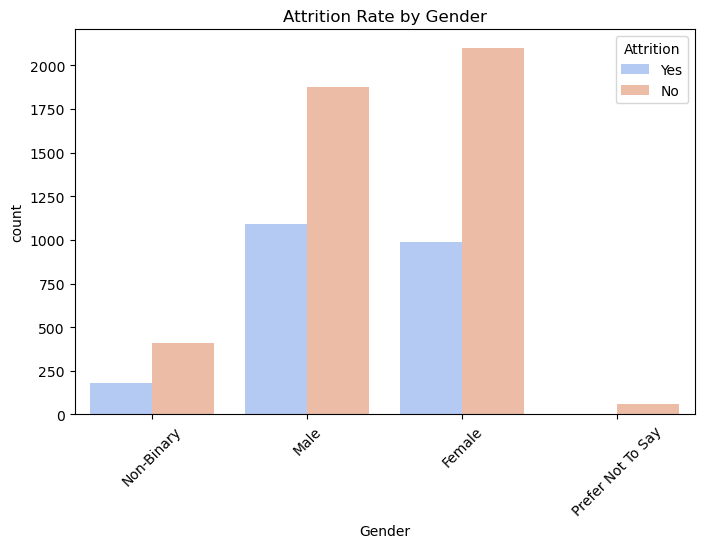

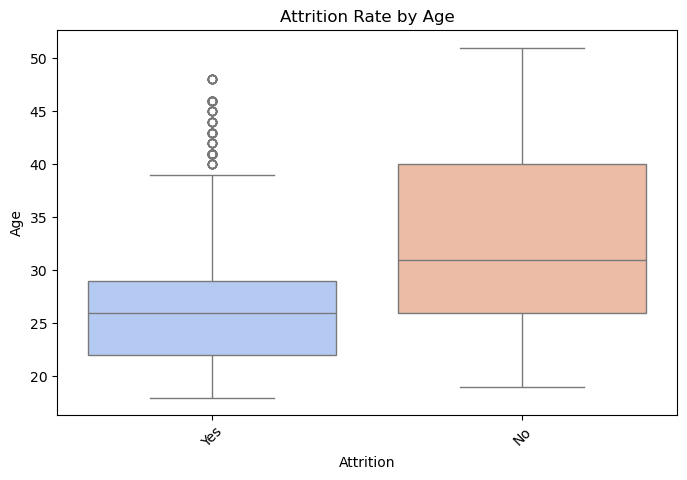

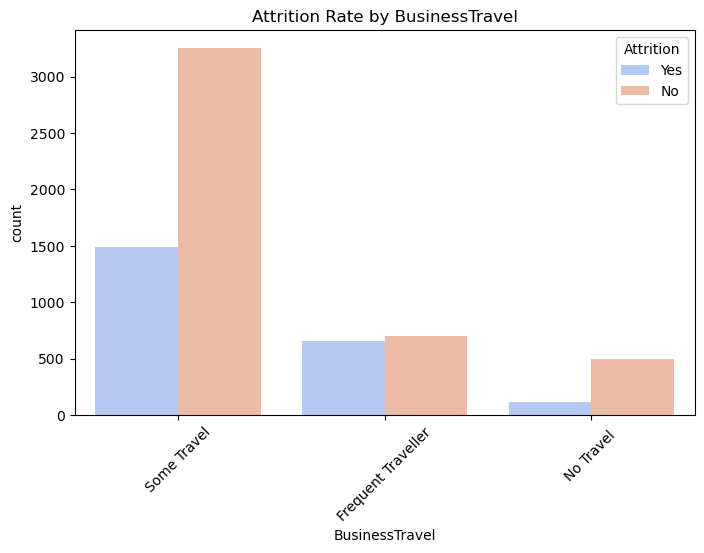

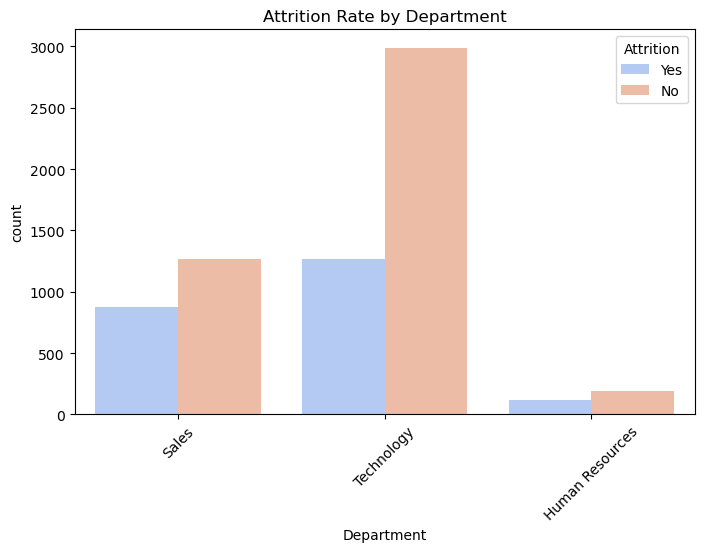

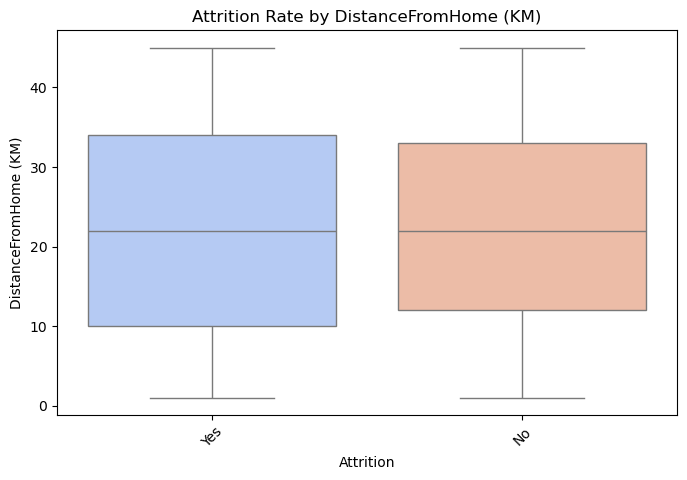

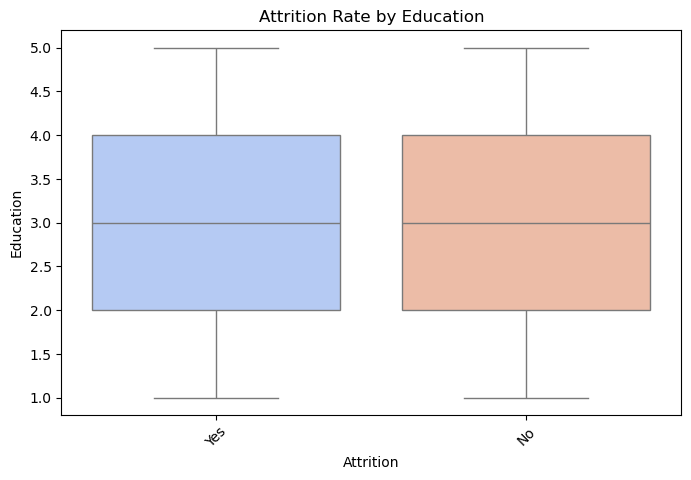

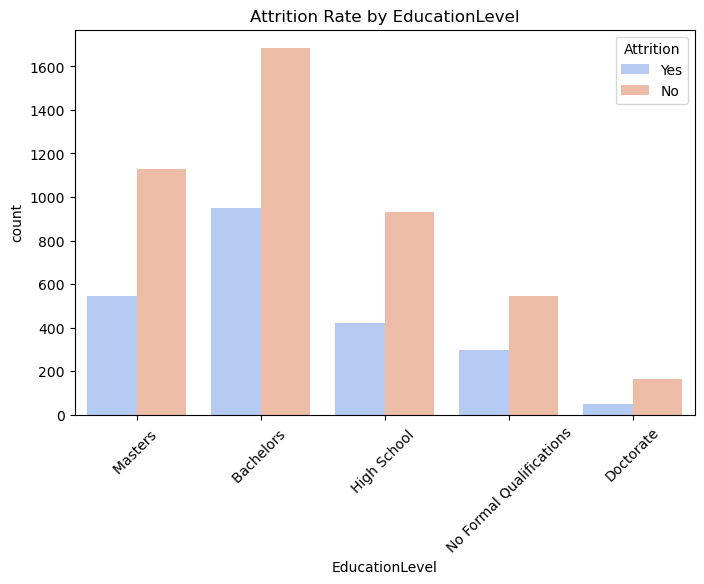

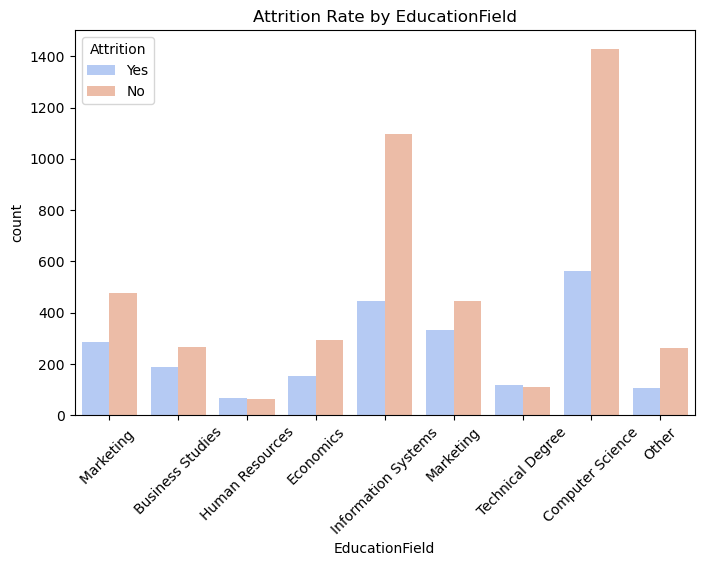

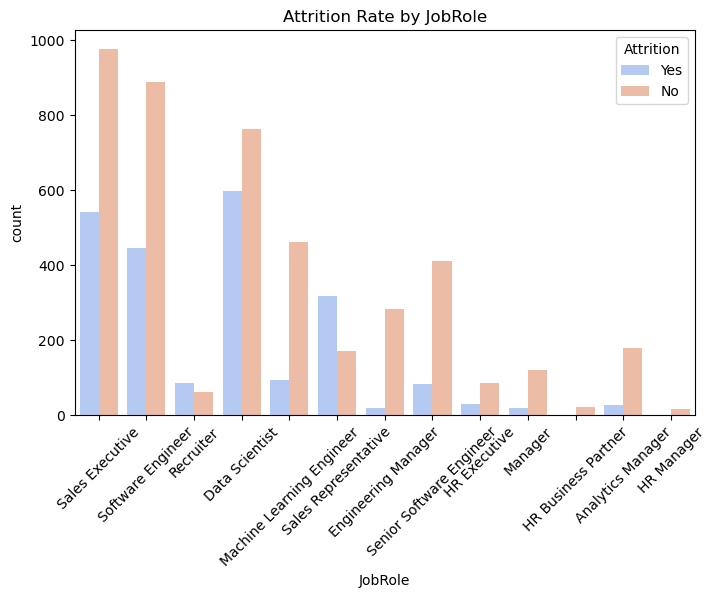

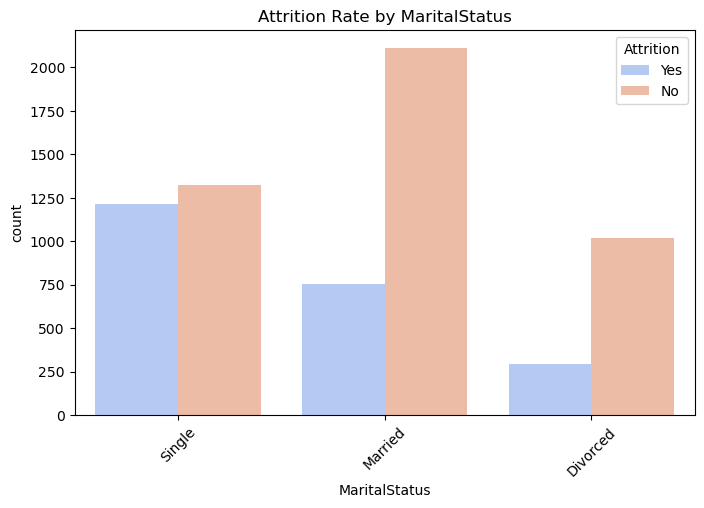

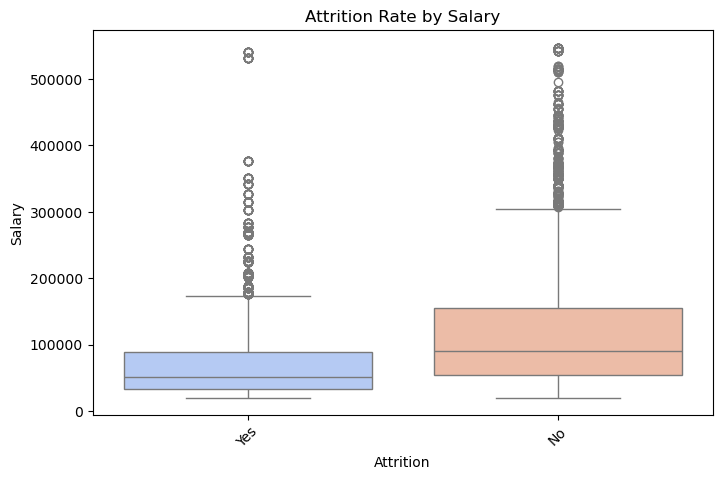

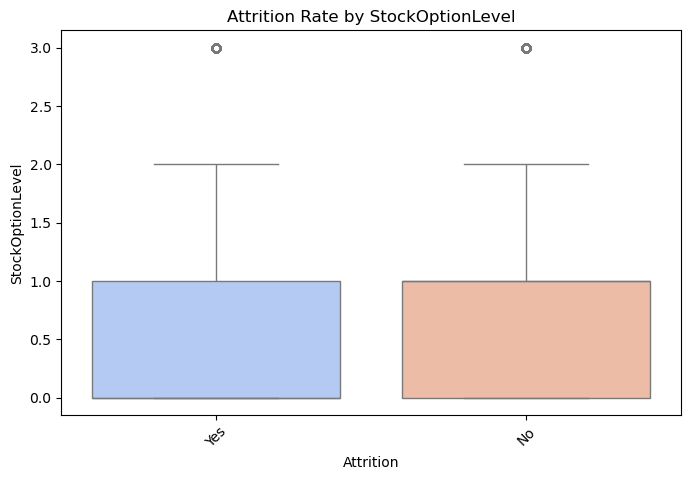

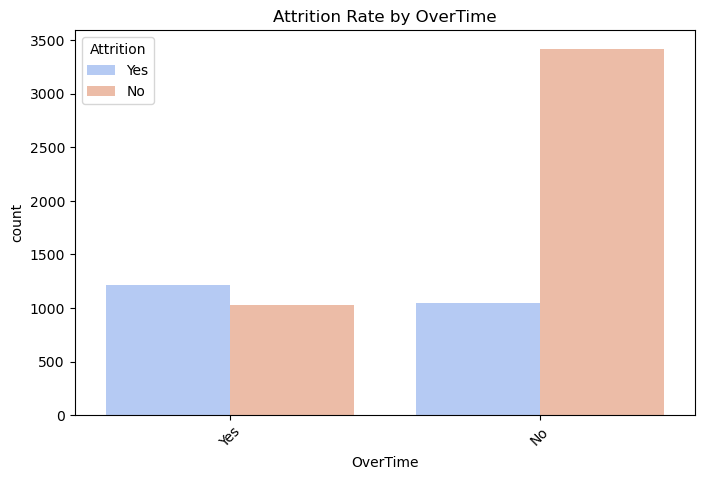

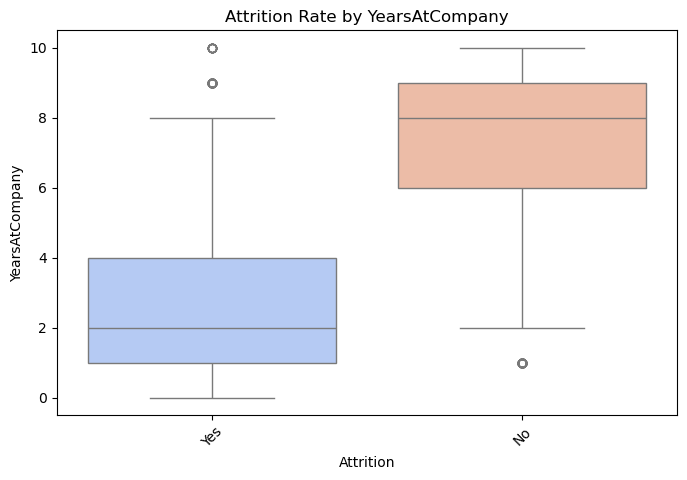

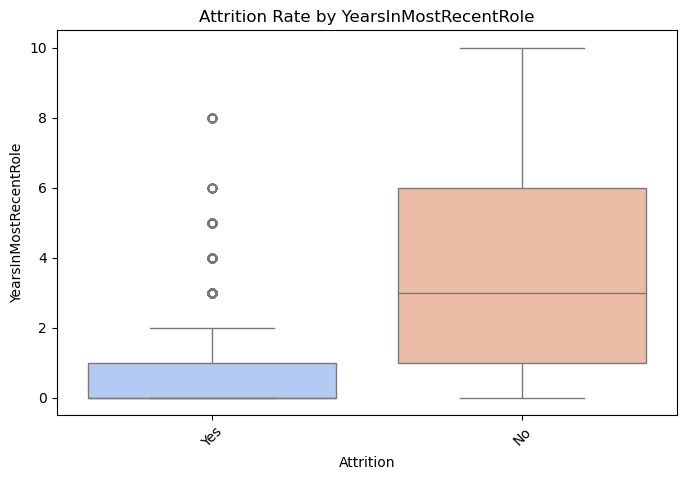

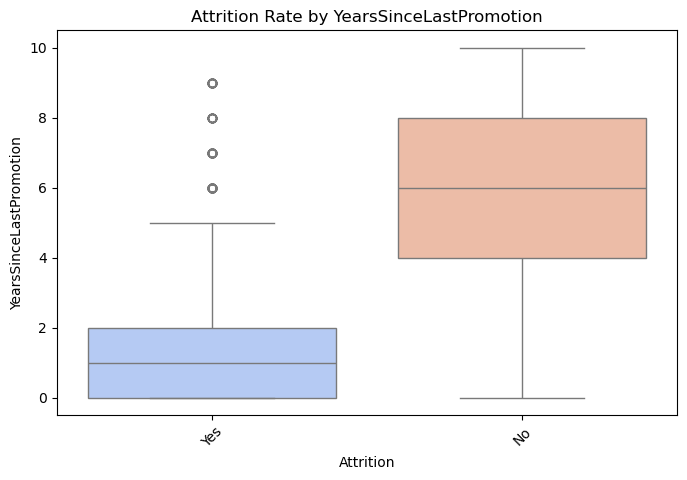

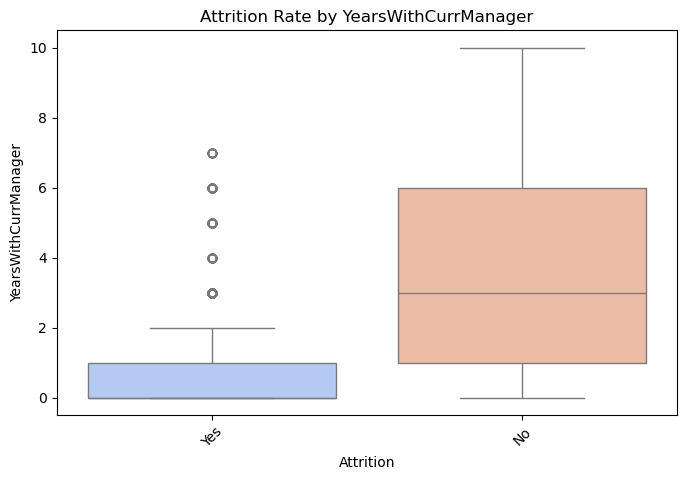

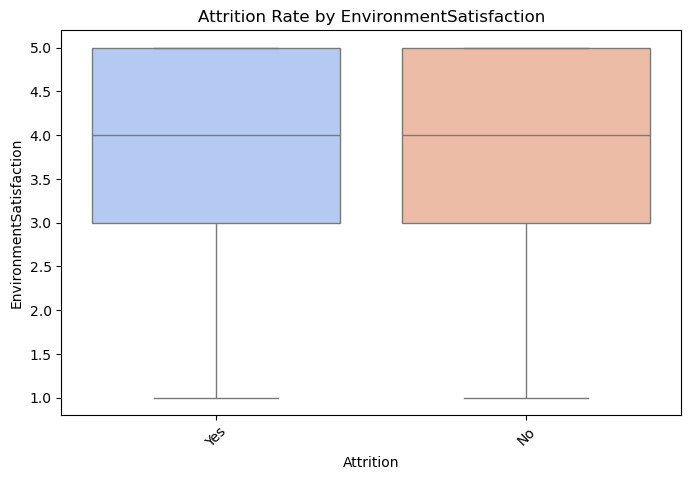

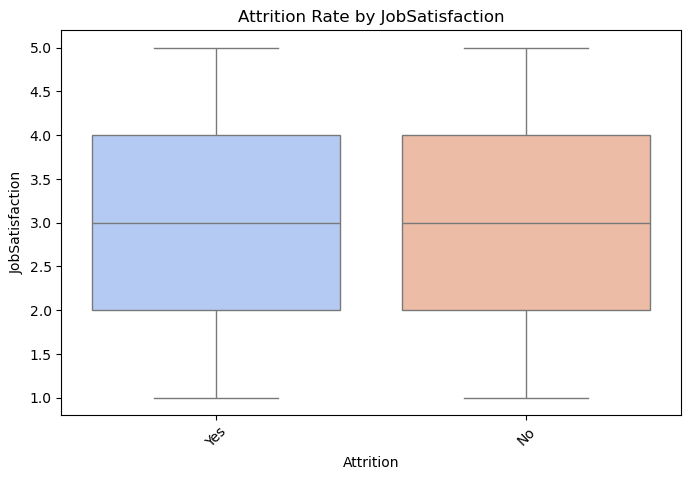

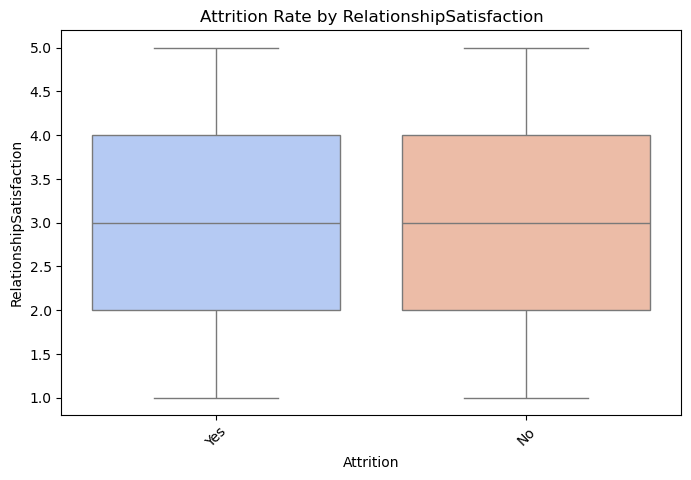

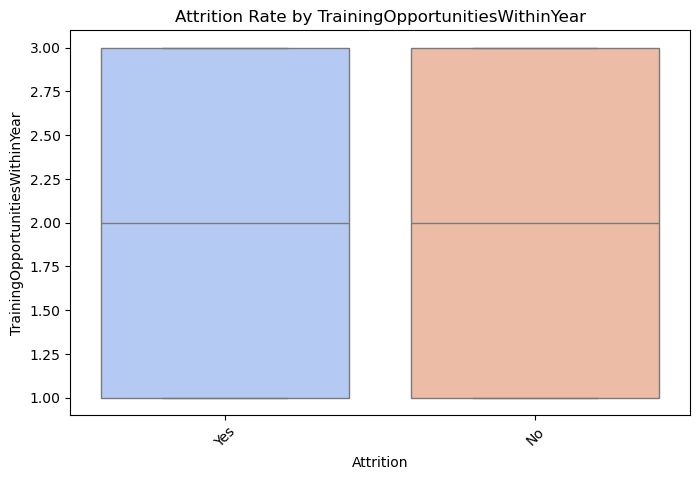

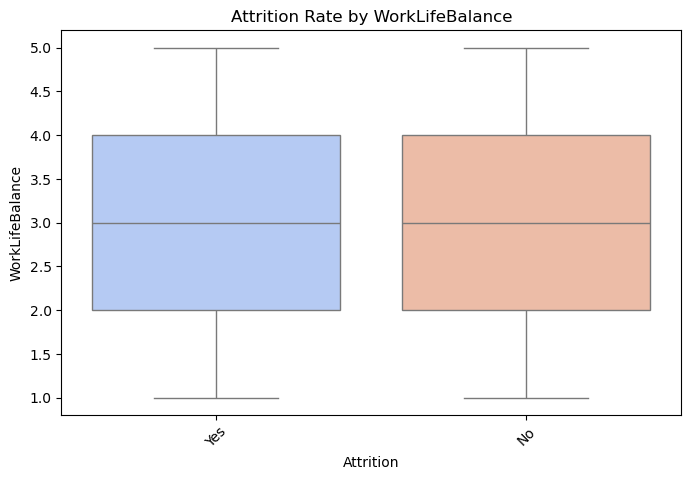

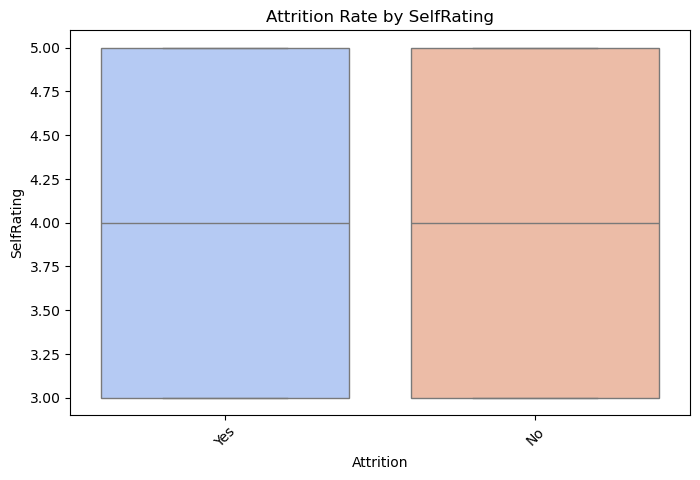

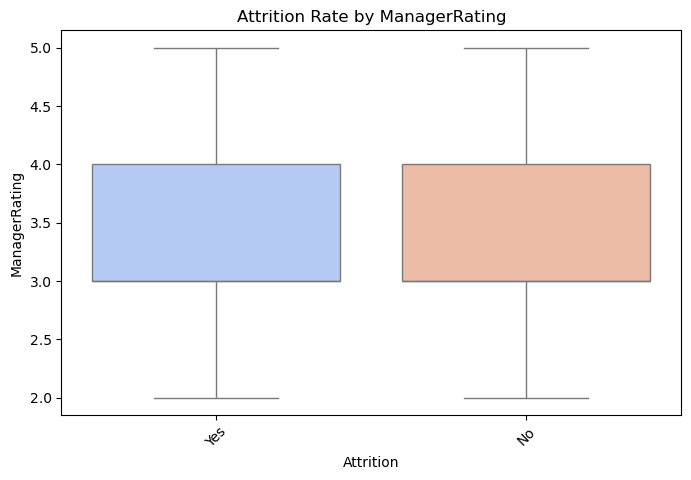

In [116]:
factors = ['Gender', 'Age', 'BusinessTravel', 'Department', 'DistanceFromHome (KM)', 'Education', 'EducationLevel', 'EducationField', 'JobRole', 'MaritalStatus', 'Salary', 'StockOptionLevel', 'OverTime', 'YearsAtCompany', 'YearsInMostRecentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction', 'TrainingOpportunitiesWithinYear', 'WorkLifeBalance', 'SelfRating', 'ManagerRating']

for factor in factors:
    plt.figure(figsize=(8, 5))
    if final_data[factor].dtype == 'object':
        sns.countplot(x=final_data[factor], hue=final_data['Attrition'], palette='coolwarm')
    else:
        sns.boxplot(x=final_data['Attrition'], y=final_data[factor], hue=final_data['Attrition'], palette='coolwarm', legend=False)
    plt.title(f"Attrition Rate by {factor}")
    plt.xticks(rotation=45)
    plt.show()

In [121]:
for factor in factors:
    if final_data[factor].dtype == 'object':
        contingency_table = pd.crosstab(final_data[factor], final_data['Attrition'])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        print(f"\n Chi-Square Test between {factor} and Attrition: p-value = {p:.5f}")
    else:
        resigned = final_data[final_data['Attrition'] == 'Yes'][factor]
        stayed = final_data[final_data['Attrition'] == 'No'][factor]
        t_stat, p_value = ttest_ind(resigned, stayed, equal_var=False)
        print(f"\n T-test between {factor} and Attrition: p-value = {p_value:.5f}")


 Chi-Square Test between Gender and Attrition: p-value = 0.00000

 T-test between Age and Attrition: p-value = 0.00000

 Chi-Square Test between BusinessTravel and Attrition: p-value = 0.00000

 Chi-Square Test between Department and Attrition: p-value = 0.00000

 T-test between DistanceFromHome (KM) and Attrition: p-value = 0.34391

 T-test between Education and Attrition: p-value = 0.13055

 Chi-Square Test between EducationLevel and Attrition: p-value = 0.00011

 Chi-Square Test between EducationField and Attrition: p-value = 0.00000

 Chi-Square Test between JobRole and Attrition: p-value = 0.00000

 Chi-Square Test between MaritalStatus and Attrition: p-value = 0.00000

 T-test between Salary and Attrition: p-value = 0.00000

 T-test between StockOptionLevel and Attrition: p-value = 0.00000

 Chi-Square Test between OverTime and Attrition: p-value = 0.00000

 T-test between YearsAtCompany and Attrition: p-value = 0.00000

 T-test between YearsInMostRecentRole and Attrition: p-val

# Summary of Week 2 Analysis - Attrition Rate and Influencing Factors  

1️⃣ Overall Attrition Rate:  
 The overall attrition rate in the company is **33.7%**, meaning about one-third of employees leave.  

2️⃣ Analysis of Influencing Factors:  
 Conducted **Chi-Square Test** and **T-Test** to measure the impact of each factor on attrition.

# Conclusion:  
The analysis indicates that factors like **salary, business travel, overtime, and department** significantly affect attrition.  
Companies should focus on improving these areas to reduce employee turnover.  

# 3: Forecasting Questions Phase

In [174]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
df = final_data.copy()

In [178]:
print(final_data.head()) 

  EmployeeID   FirstName  LastName      Gender  Age      BusinessTravel  \
0  79F7-78EC  Alessandra  Storrock  Non-Binary   27         Some Travel   
1  B61E-0F26        Care   Heintze        Male   28  Frequent Traveller   
2  F5E3-48BB       Zenia   Rattery      Female   25  Frequent Traveller   
3  0678-748A     Maurits   Farmery        Male   25         Some Travel   
4  541F-3E19         Dot    Aherne      Female   27         Some Travel   

        Department  DistanceFromHome (KM) State  \
0            Sales                     37    CA   
1       Technology                      3    NY   
2  Human Resources                      3    CA   
3            Sales                      4    CA   
4       Technology                     30    CA   

                          Ethnicity  ...  EnvironmentSatisfaction  \
0                             White  ...                        5   
1                             White  ...                        5   
2  American Indian or Alaska Native

In [180]:
target = 'Attrition' 
le_target = LabelEncoder()
final_data[target] = le_target.fit_transform(final_data[target])
X = final_data.drop(columns=[target])
y = final_data[target]

In [182]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [184]:
datetime_columns = X_train.select_dtypes(include=['datetime64']).columns
print("Datetime columns:", datetime_columns)

Datetime columns: Index(['HireDate', 'ReviewDate'], dtype='object')


In [186]:
X_train = X_train.drop(columns=datetime_columns)
X_test = X_test.drop(columns=datetime_columns)

In [188]:
non_numeric_columns = X_train.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index(['EmployeeID', 'FirstName', 'LastName', 'Gender', 'BusinessTravel',
       'Department', 'State', 'Ethnicity', 'EducationField', 'JobRole',
       'MaritalStatus', 'OverTime', 'EducationLevel', 'PerformanceID',
       'SatisfactionLevel', 'RatingLevel'],
      dtype='object')


In [190]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1) 
X_train[non_numeric_columns] = encoder.fit_transform(X_train[non_numeric_columns])
X_test[non_numeric_columns] = encoder.transform(X_test[non_numeric_columns])

In [192]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [194]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [196]:
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

In [198]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

In [202]:
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)
print(f'ROC AUC Score: {roc_auc:.4f}')

Accuracy: 0.8763
Confusion Matrix:
 [[788 111]
 [ 55 388]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90       899
           1       0.78      0.88      0.82       443

    accuracy                           0.88      1342
   macro avg       0.86      0.88      0.86      1342
weighted avg       0.88      0.88      0.88      1342

ROC AUC Score: 0.9513


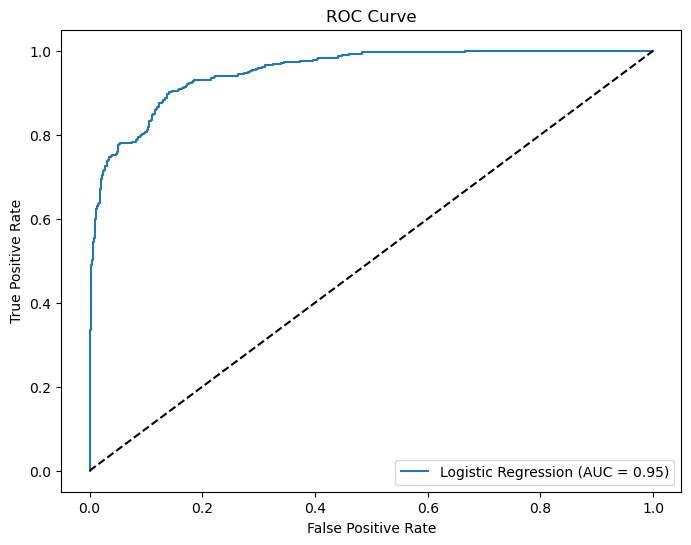

In [204]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()